In [1]:
import cv2
import glob
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from keras.utils import load_img
from numpy import random
from skimage.feature import hog

In [2]:
# Đường dẫn đến thư mục chứa ảnh male và female
male_dir = "D:/gender-classification-dataset/Train_0/Male"
female_dir = "D:/gender-classification-dataset/Train_0/Female"

In [3]:
# Đọc và xử lý ảnh thành vector đặc trưng
def get_image_vector(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img / 255.0
    features, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, transform_sqrt=True)
    return features

In [4]:
# Tạo danh sách các vector đặc trưng và nhãn tương ứng
X = []
y = []
for image_path in glob.glob(male_dir + '/*.jpg'):
    X.append(get_image_vector(image_path))
    y.append(0)  # Nhãn 0 cho giới tính nam
for image_path in glob.glob(female_dir + '/*.jpg'):
    X.append(get_image_vector(image_path))
    y.append(1)  # Nhãn 1 cho giới tính nữ

In [5]:
def display_hog_images(dir_path, num_images=5):
    # Lấy danh sách các tệp tin trong thư mục
    files = os.listdir(dir_path)
    # Lấy num_images ảnh ngẫu nhiên
    files = random.sample(files, num_images)
    # Hiển thị các ảnh và đặc trưng HOG tương ứng
    fig, axes = plt.subplots(nrows=num_images, ncols=3, figsize=(8, 20))
    for i, ax in enumerate(axes):
        # Đọc ảnh
        image = cv2.imread(os.path.join(dir_path, files[i]))
        # Chuyển sang grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Trích xuất đặc trưng HOG
        fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2), visualize=True, transform_sqrt=True)
        # Hiển thị ảnh gốc
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title('Normal')
        # Hiển thị ảnh xám
        ax[1].imshow(gray_image, cmap='gray')
        ax[1].set_title('Gray')
        # Hiển thị đặc trưng HOG
        ax[2].imshow(hog_image, cmap='gray')
        ax[2].set_title('HOG')
        ax[0].axis('off')
        ax[1].axis('off')
        ax[2].axis('off')
    plt.tight_layout()
    plt.show()


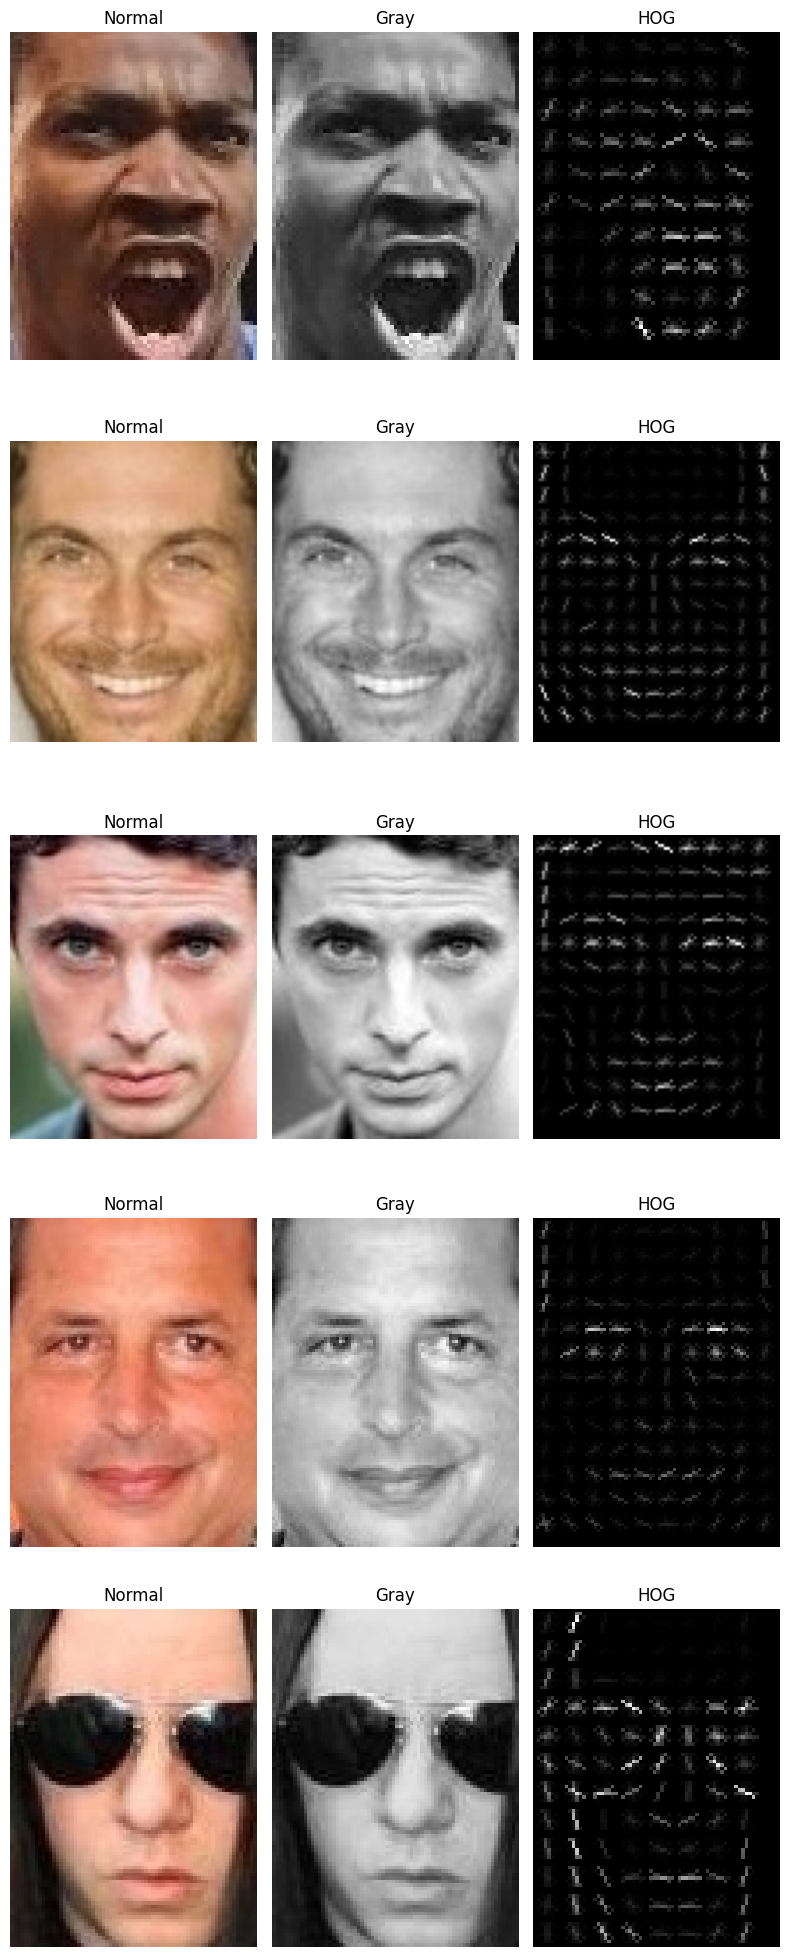

In [6]:
import random
display_hog_images(male_dir, num_images=5)

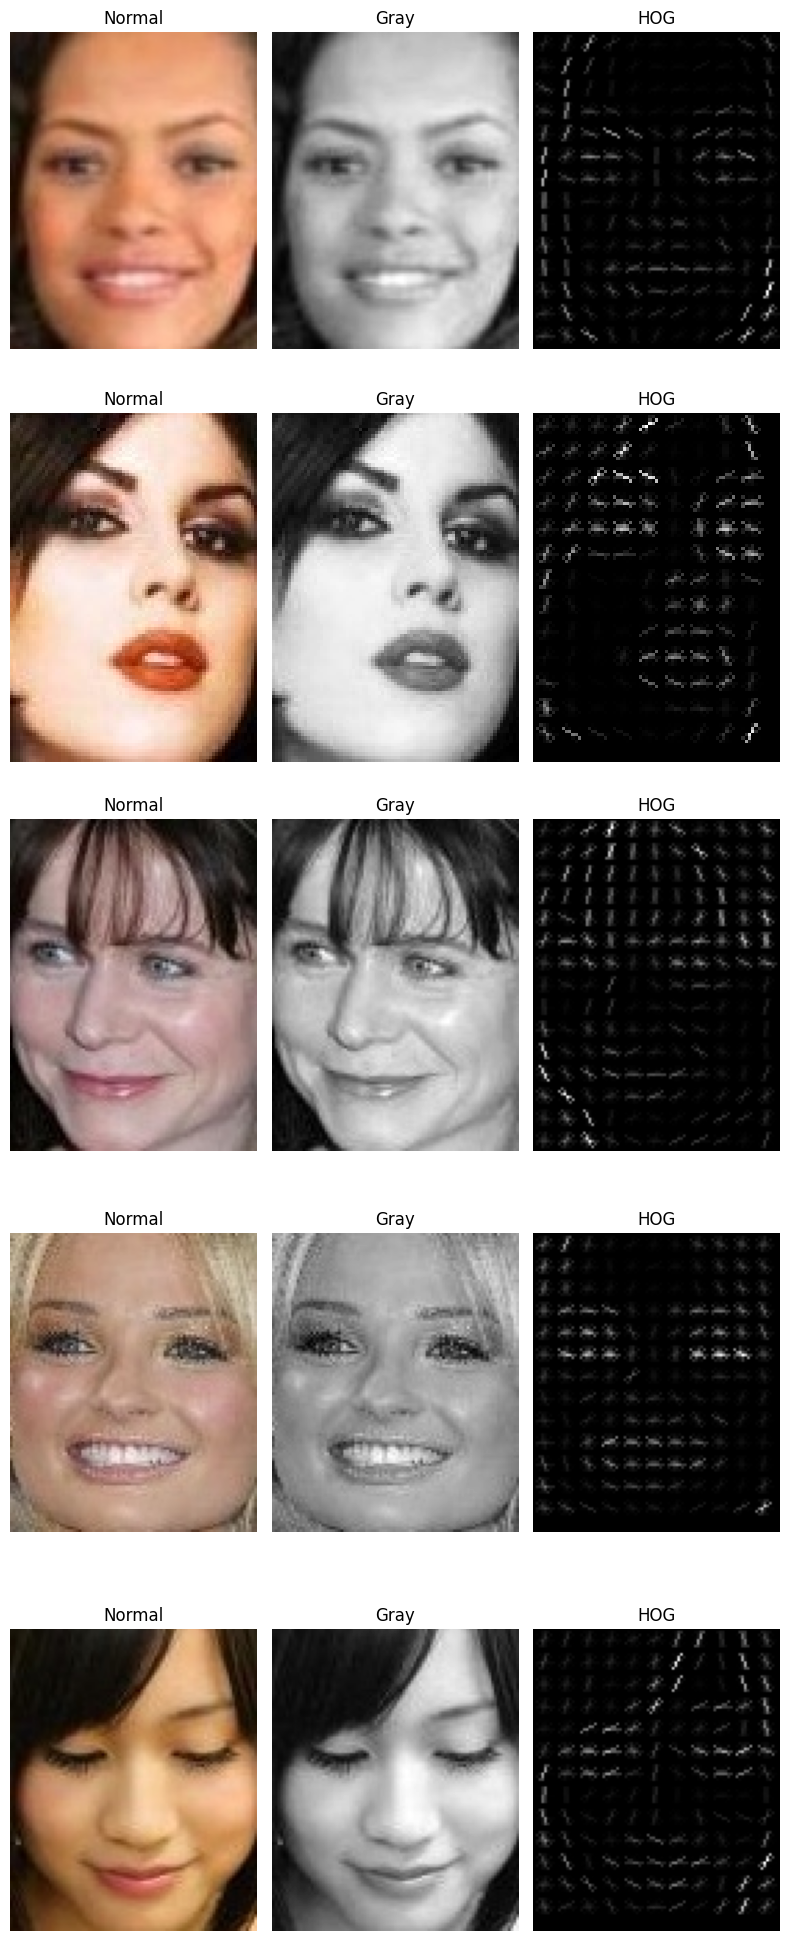

In [7]:
display_hog_images(female_dir, num_images=5)

In [8]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# Khởi tạo mô hình SVM với kernel
model = SVC(kernel='rbf', C=10, gamma='scale',coef0=0, probability=True)

In [10]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

SVC(C=10, coef0=0, probability=True)

In [11]:
from joblib import dump, load
dump(model, 'D:/gender-classification-dataset/Model/model2.sav')

['D:/gender-classification-dataset/Model/model2.sav']

In [13]:
from sklearn.metrics import accuracy_score
# Testing the model using the testing data
y_pred = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")


The model is 94.4905339289513% accurate
